# Advent of Code 2021
## Day 5

### Visualization Library

In [1]:
import PIL.Image
from io import BytesIO
import IPython.display
import numpy as np
import html
html_formatter = get_ipython().display_formatter.formatters['text/html']

def int_array_to_image(a, fmt='png'):
    a = 240 - (a/a.max() * 224).astype(np.uint8)
    f = BytesIO()
    PIL.Image.fromarray(a).save(f, fmt)
    return IPython.display.Image(data=f.getvalue())

def double_bitmap(a):
    (h, w) = a.shape
    return np.tile(a.reshape((-1, 1)), 2).reshape((h, w*2))

def quad_bitmap(a):
    return double_bitmap(double_bitmap(a).T).T

def ndarray_to_html(a):
    if len(a.shape) == 2 and a.min() >= 0:
        while a.size < 1024:
            a = quad_bitmap(a)

        for bundle in int_array_to_image(a)._repr_mimebundle_():
            for mimetype, b64value in bundle.items():
                if mimetype.startswith('image/'):
                    src = f'data:{mimetype};base64,{b64value}'
                    return f'<img src="{src}">'
    else:
        return "<pre>{}</pre>".format(html.escape(repr(a)))

html_formatter.for_type(np.ndarray, ndarray_to_html)
None

### Part 1

In [2]:
from collections import namedtuple
import numpy as np

In [3]:
import aocd
inputs = aocd.get_data(day=5, year=2021).split('\n')
inputs[:5]

['818,513 -> 818,849',
 '259,377 -> 259,599',
 '120,758 -> 977,758',
 '49,386 -> 170,386',
 '773,644 -> 773,745']

In [4]:
Point = namedtuple('Point', ['x', 'y'])
lines = []
for input_line in inputs:
    p1, p2 = input_line.split(' -> ')
    p1 = Point(*map(int, p1.split(',')))
    p2 = Point(*map(int, p2.split(',')))
    lines.append((p1, p2))
lines[:5]

[(Point(x=818, y=513), Point(x=818, y=849)),
 (Point(x=259, y=377), Point(x=259, y=599)),
 (Point(x=120, y=758), Point(x=977, y=758)),
 (Point(x=49, y=386), Point(x=170, y=386)),
 (Point(x=773, y=644), Point(x=773, y=745))]

In [5]:
grid = np.zeros((1000,1000), dtype=int)
print(grid)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])
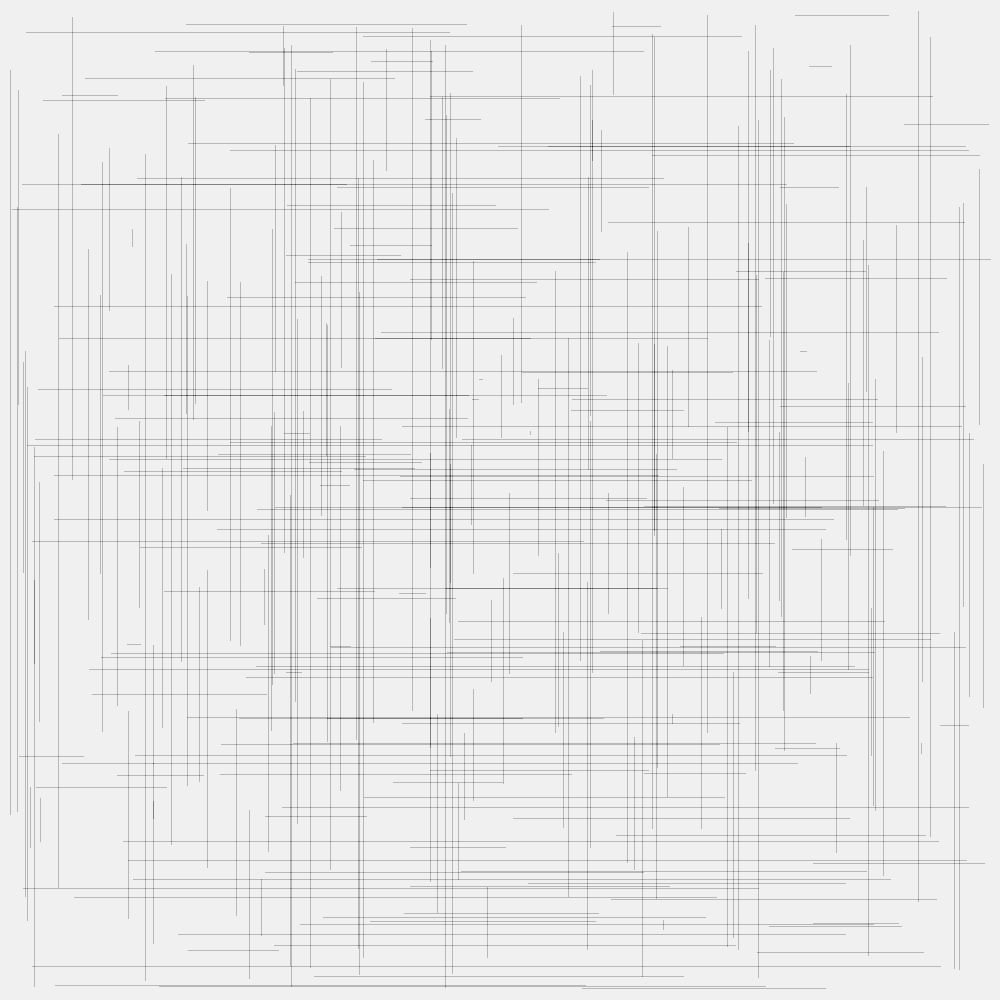

In [6]:
def draw_vent_lines(include_diagonals=False):
    grid = np.zeros((1000,1000), dtype=int)
    for (p1, p2) in lines:
        # draw it on the grid
        if p1.x == p2.x:
            # draw a vertical line
            (y1, y2) = sorted([p1.y, p2.y])
            for i in range(y1, y2 + 1):
                grid[p1.x, i] += 1
        elif p1.y == p2.y:
            # draw a horizontal line
            (x1, x2) = sorted([p1.x, p2.x])
            for i in range(x1, x2 + 1):
                grid[i, p1.y] += 1
        elif include_diagonals:
            # draw a diagonal line
            if p1.x > p2.x:
                (p1, p2) = (p2, p1)
            if p1.y < p2.y:
                # descending diagonal
                for i in range(p2.x + 1 - p1.x):
                    grid[p1.x + i, p1.y + i] += 1
            else:
                # ascending diagonal
                for i in range(p2.x + 1 - p1.x):
                    grid[p1.x + i, p1.y - i] += 1
            # print(p1, p2, p1.x - p2.x, p1.y - p2.y)
    return grid

grid = draw_vent_lines(include_diagonals=False)
grid

In [7]:
grid.max()

4

In [8]:
# then, find places where grid > 1
intersections = grid > 1

#### Part 1 Answer
Consider only horizontal and vertical lines.  
**At how many points do at least two lines overlap?**

In [9]:
np.count_nonzero(intersections)

6007

### Part 2

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])
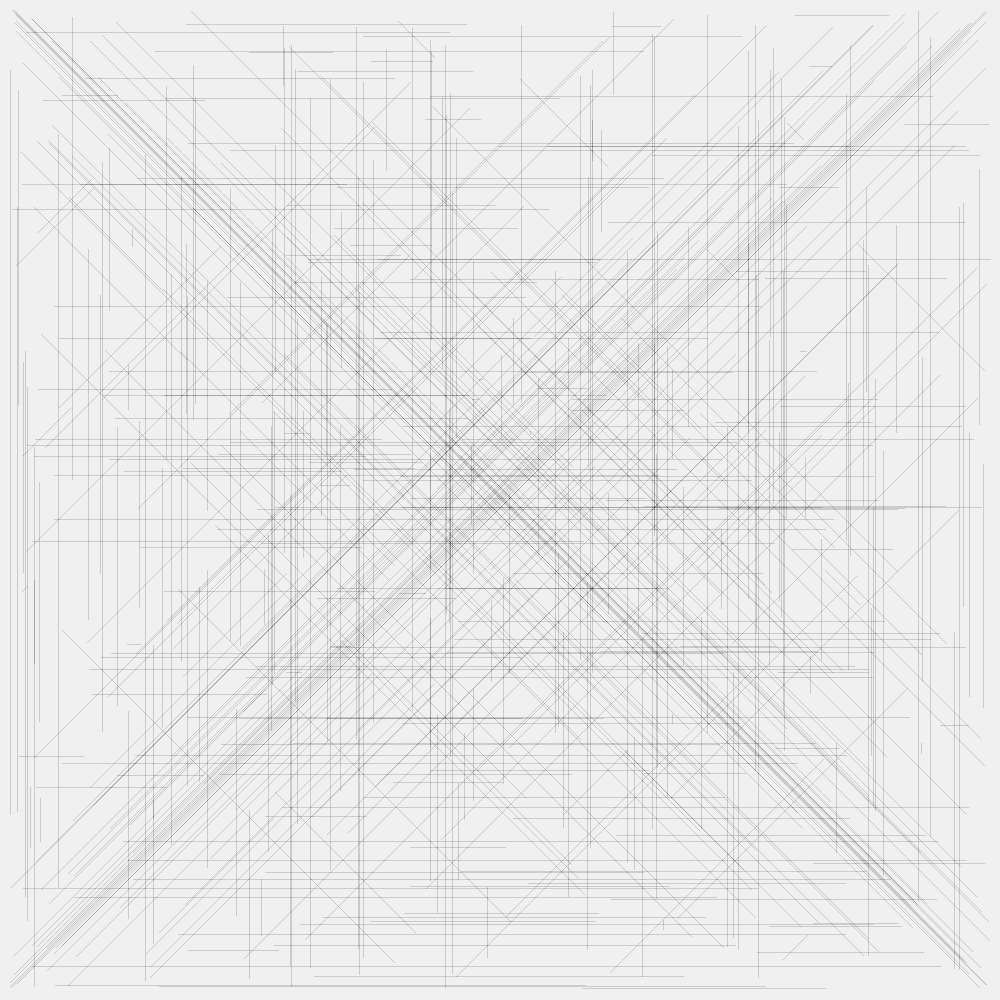

In [10]:
grid = draw_vent_lines(include_diagonals=True)
grid

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])
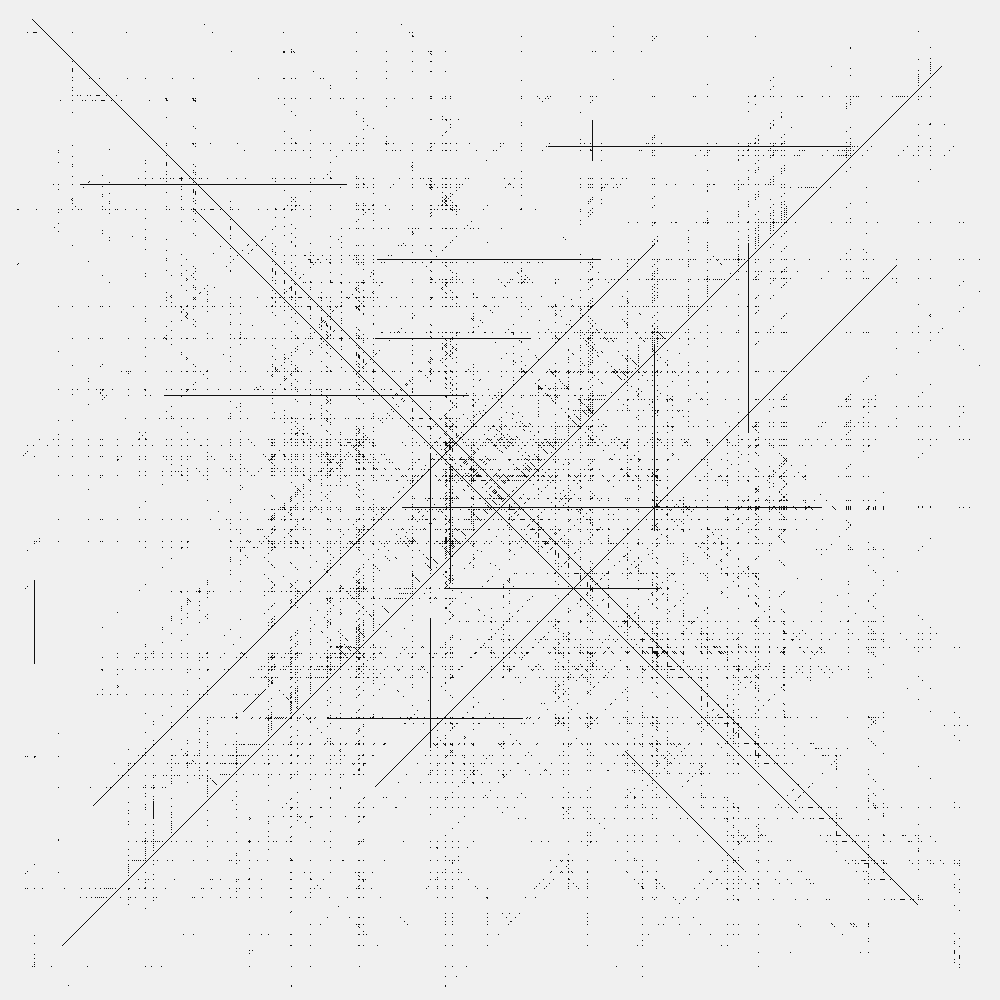

In [11]:
grid > 1

#### Part 2 Answer
Consider all of the lines.  
**At how many points do at least two lines overlap?**

In [12]:
np.count_nonzero(grid > 1)

19349